<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E4%BD%BF%E7%94%A8BRICH%E7%AE%97%E6%B3%95%E5%AF%B9%E6%95%B0%E6%8D%AE%E8%BF%9B%E8%A1%8C%E8%81%9A%E7%B1%BB%E6%93%8D%E4%BD%9C%EF%BC%8C%E5%B9%B6%E6%AF%94%E8%BE%83n_clusters%E5%8F%82%E6%95%B0%E7%9A%84%E4%BD%9C%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BIRCH算法(平衡迭代削减聚类法)

聚类特征使用3元组进行一个簇的相关信息，通过构建满足分枝因子和簇直径限制的聚类特征树来求聚类，聚类特征树其实是一个具有两个参数分枝因子和类直径的高度平衡树；分枝因子规定了树的每个节点的子女的最多个数，而类直径体现了对这一类点的距离范围；非叶子节点为它子女的最大特征值；聚类特征树的构建可以是动态过程的，可以随时根据数据对模型进行更新操作。

优缺点：
适合大规模数据集，线性效率；
只适合分布呈凸形或者球形的数据集、需要给定聚类个数和簇直接的限制；

In [1]:
from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.datasets.samples_generator import make_blobs


In [18]:
##产生模拟数据
xx = np.linspace(-22,22,10)
yy = np.linspace(-22,22,10)
xx,yy = np.meshgrid(xx,yy)
n_centres = np.hstack((np.ravel(xx)[:,np.newaxis],np.ravel(yy)[:,np.newaxis])) # 水平(按列顺序)把数组给堆叠起来，vstack()函数正好和它相反
# print(n_centres)
# np.ravel(xx)[:,np.newaxis]
X,y = make_blobs(n_samples=100000,n_features=2,centers = n_centres,random_state=0)

In [19]:
#创建不同的参数（簇直径）Birch层次聚类
birch_models = [
                Birch(threshold=1.7,n_clusters=None),
                Birch(threshold=0.5,n_clusters=None),
                Birch(threshold=1.7,n_clusters=100)]
# n_clusters 是否限制类的数量
# threshold 簇直径的阈值 ，branching_factor:最大叶子个数

Birch algorithm,parameters info:diameter = 1.7;n_cluster=none; time cost :3.186 s; cluster centers number: 158 
Birch algorithm,parameters info:diameter = 0.5;n_cluster=None; time cost :6.010 s; cluster centers number: 3196 
Birch algorithm,parameters info:diameter=1.7;n_clusters=100; time cost :3.180 s; cluster centers number: 100 


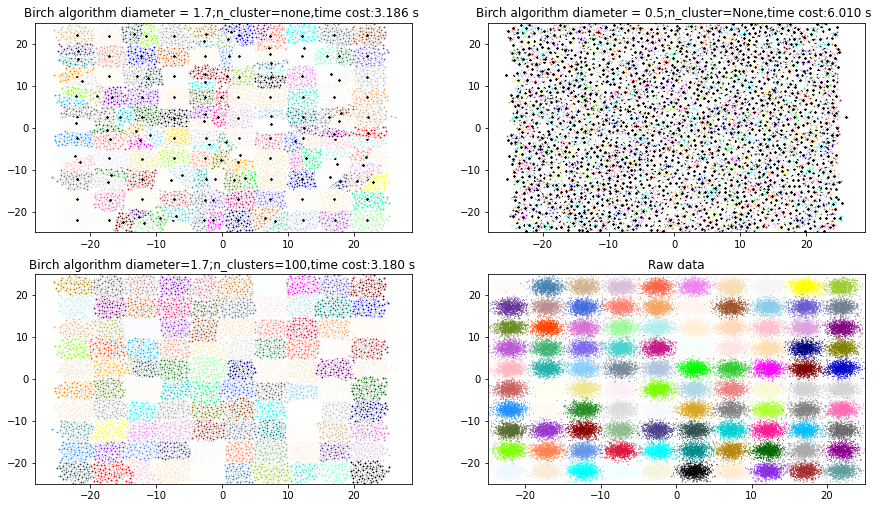

In [20]:
#画图
final_step = [u'diameter = 1.7;n_cluster=none',u'diameter = 0.5;n_cluster=None',u'diameter=1.7;n_clusters=100']

plt.figure(figsize=(12,8),facecolor='w')
plt.subplots_adjust(left=0.02,right=0.98,bottom=0.1,top = 0.9) #调整子图布局，

colors_ = cycle(colors.cnames.keys())
cm = mpl.colors.ListedColormap(colors.cnames.keys())
for ind,(birch_model,info) in enumerate(zip(birch_models,final_step)):
  t = time()
  birch_model.fit(X)
  time_ = time()-t
  labels = birch_model.labels_
  centroids = birch_model.subcluster_centers_
  n_clusters = len(np.unique(centroids)) #该函数是去除数组中的重复数字，并进行排序之后输出。
  print("Birch algorithm,parameters info:%s; time cost :%.3f s; cluster centers number: %d "%(info,time_,len(np.unique(labels))))
  subinx = 221 + ind
  plt.subplot(subinx)
  for this_centroid,k,col in zip(centroids,range(n_clusters),colors_):
    mask = labels == k
    plt.plot(X[mask,0],X[mask,1],'w',markerfacecolor = col,marker='.')
    if birch_model.n_clusters is None:
      plt.plot(this_centroid[0],this_centroid[1],'*',markerfacecolor=col,markeredgecolor='k',markersize = 2)

  plt.ylim([-25,25])
  plt.ylim([-25,25])
  plt.title(u'Birch algorithm %s,time cost:%.3f s ' %(info,time_))
  plt.grid(False)
     

plt.subplot(224)
plt.scatter(X[:,0],X[:,1],c=y,s=1,cmap=cm,edgecolors= 'none')
plt.ylim([-25,25]) 
plt.xlim([-25,25])
plt.title(u'Raw data')
plt.grid(False)

plt.show()